#  Titanic Survial Predicions via Logistic Regression Model
We will be using the given datset. We will classify two classes here, dead and survived people.

###  Importing Libraries

In [44]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 

%matplotlib inline

###  Fetching the data from Data set

In [45]:
train = pd.read_csv("Titanic-Dataset.csv")

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we have the data, what's our problem? We will be using features like Name, Sex, Age, Pclass etc. To predict whether the person **Survived** or not.

Obviously we will be doing data preprocessing to see which part of data is necessary and which is not. So, we will be dropping some features that doesn't effect our prediction such as Name, PassengerID and others.

Beforehand we will be doing Data visulaization

##  Exploratory Data Analysis (EDA)
Let's search for missing values!

In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To represent Missing values,we can use data visualization

## 🔥 Heatmap

<Axes: >

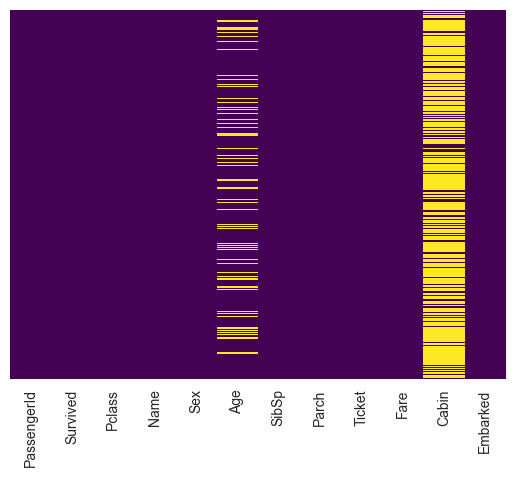

In [48]:

sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

##  Countplot

Now, here the missing values can be visualized very clearly. Hence, this method is more proficient for presentations stuff at industry level.

C:\Users\sudha\AppData\Local\Temp\ipykernel_21580\2289485805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Survived", data = train, palette = 'rainbow').set_title('Survived Data')


Text(0.5, 1.0, 'Survived Data')

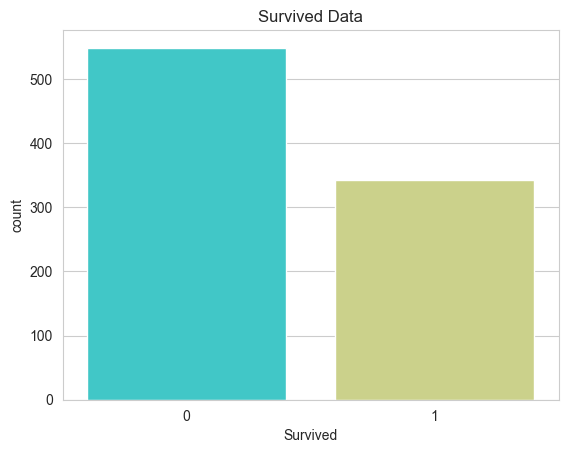

In [49]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = train, palette = 'rainbow').set_title('Survived Data')

C:\Users\sudha\AppData\Local\Temp\ipykernel_21580\1062090282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Sex", data = train, palette = 'rocket').set_title('No.of Male vs Female')


Text(0.5, 1.0, 'No.of Male vs Female')

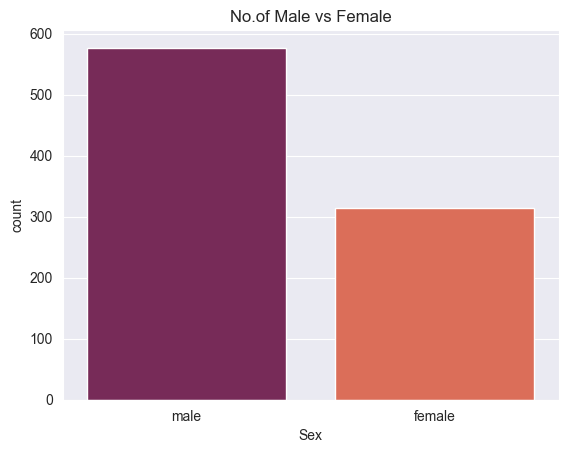

In [50]:

sns.set_style('darkgrid')
sns.countplot(x = "Sex", data = train, palette = 'rocket').set_title('No.of Male vs Female')

<Axes: xlabel='Survived', ylabel='count'>

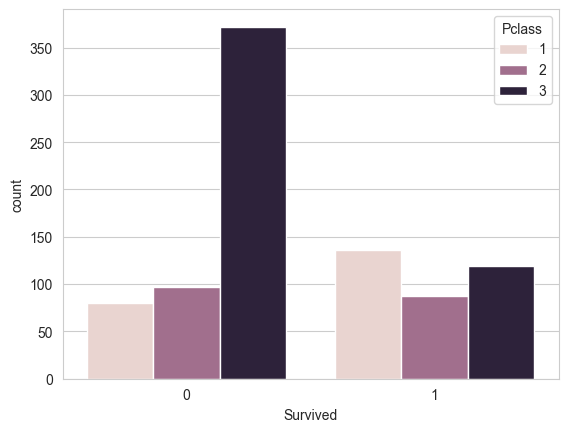

In [51]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived", hue = 'Pclass', data = train)

##  Histogram

<Axes: >

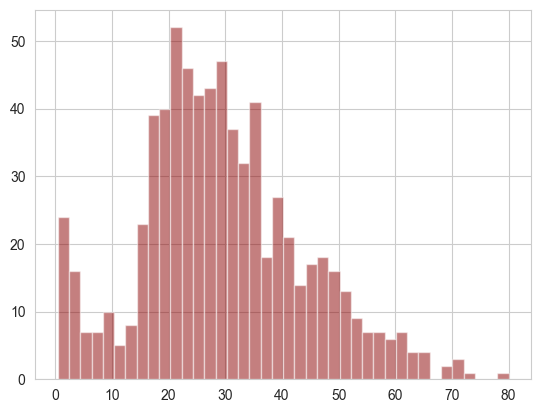

In [52]:
train['Age'].hist(bins=40, color='darkred', alpha=0.5)

<Axes: >

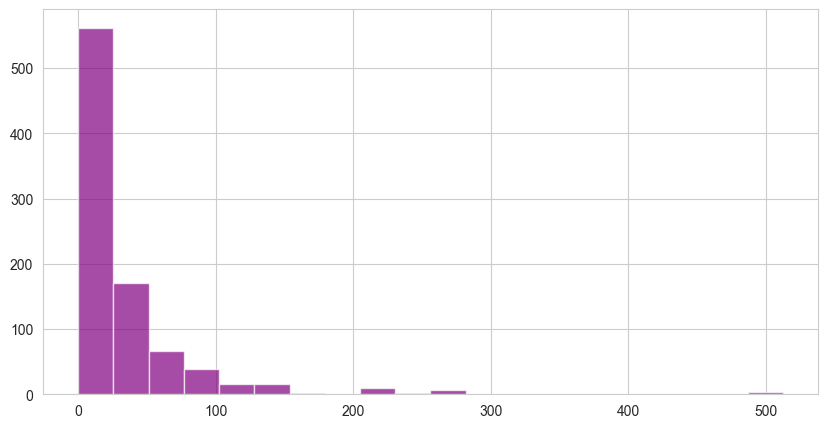

In [53]:
train['Fare'].hist(bins=20, color='purple', alpha = 0.7, figsize = (10, 5))

##  Data cleaning
That is we are going to fill the missing values, as we have seen using heatmap that we cannot afford to drop those missing values as we may lost a huge amount of data.

Replacing values is known as imputation. So, we are going to impute average values.

---
Getting the average Age

C:\Users\sudha\AppData\Local\Temp\ipykernel_21580\2797120587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')


<Axes: xlabel='Pclass', ylabel='Age'>

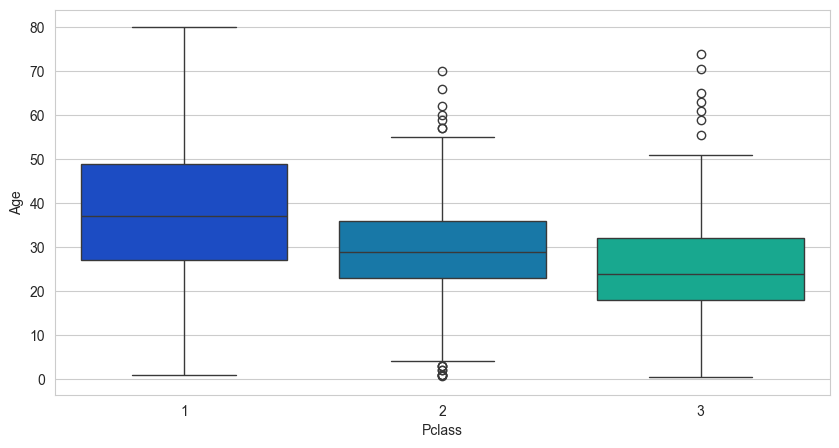

In [54]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

Let's say we have average age as:
- 1st class ==> 37
- 2nd class ==> 28
- 3rd class ==> 25


Now we will make a function that will replace all the null values for specific PClass with average age in that class

##  Inputing Average Age

In [55]:

def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age
            

In [56]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

C:\Users\sudha\AppData\Local\Temp\ipykernel_21580\675125451.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\sudha\AppData\Local\Temp\ipykernel_21580\675125451.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

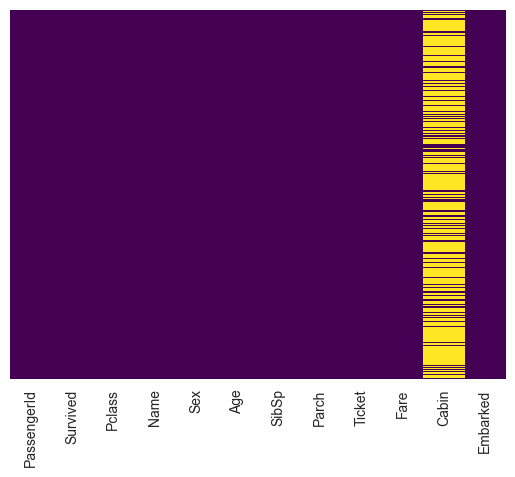

In [57]:
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

###  Dropping unnecessary columns
Such that: Name, Cabin, PassengerID etc

In [58]:
# cabin
train.drop('Cabin', inplace = True, axis = 1)

<Axes: >

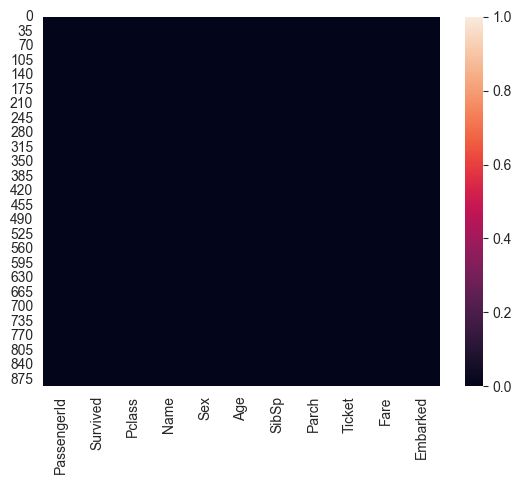

In [59]:
sns.heatmap(train.isnull())

In [60]:
train.shape # 1 column is dropped now

(891, 11)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##  Converting Categorcial Features
As we know that ML model only works for numerical not categorical values. 

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


---

As we have **Object(4)** so it means there are 4 string type of categorical values that needs to be converted into numercial values. But we don't need **Names** and **PassengerID** as it doesn't effect whether a person lives or die.

---


In [63]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [64]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [65]:
embark 

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [66]:

train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [67]:
train 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


##  Concat Numerical Values
Now the next step is to combine or concatenate the features that we just converted from categorical to numerical.

In [68]:
train = pd.concat([train, sex, embark], axis = 1)

In [69]:
train 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,25.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


 #  Building Logistic Regression Model
 ## Machine Learning Model
 As the concept is same, we will split the data into two parts i.e. Train and Test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
Y = train['Survived'] 

In [72]:
X = train.drop(['Survived'], axis=1) 

In [73]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,25.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

##  Training and Prediction via Model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logReg = LogisticRegression()

In [77]:

logReg.fit(X_train, Y_train)

C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
predictions = logReg.predict(X_test)

## 📝 Evalutaion

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



##  Making a .csv File of the Predictions
This file can be submitted on <a href="http://kaggle.com/">kaggle</a> or you for any other purpose where you want to show your predicitons

In [81]:
pred = logReg.predict(X)

In [82]:
pred.shape

(891,)

In [83]:
X.shape 

(891, 9)

In [84]:
submission = pd.DataFrame({
    'PassengerId' : X['PassengerId'],
    'Survived' : pred
})

In [85]:
submission.head

<bound method NDFrame.head of      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         0
890          891         0

[891 rows x 2 columns]>

###  Converting DataFrame into .csv File

In [86]:
submission.to_csv('Titanic-Survival-Predictions.csv')